# **Advanced Fraud Detection with Anomaly Detection**
The primary goal of this project is to enhance the accuracy and sensitivity of fraud detection systems in financial institutions. By combining traditional machine learning models with anomaly detection techniques, we aim to identify rare and novel fraud patterns that might be overlooked by conventional models. This will help financial institutions detect fraudulent transactions more effectively, reducing losses and improving customer trust.

## **Problem Statement**
Credit card fraud is an increasing concern for financial institutions and consumers alike. Fraudulent activities not only lead to significant financial losses but also damage the trust in the banking system. This project aims to develop an advanced fraud detection system using machine learning techniques, including anomaly detection, to identify fraudulent transactions with high accuracy and minimal false positives.

## **Key Steps in the Project**

### 1. **Import Libraries and Data Collection**
In this step, we import the necessary libraries and load the dataset containing historical credit card transactions. We ensure that the dataset is correctly imported and ready for preprocessing. We will address any potential file format or loading issues and inspect the data for any immediate problems.

### 2. **Load and Preprocess Dataset**
The dataset is loaded into the environment, and we perform essential preprocessing steps. This includes handling missing values, encoding categorical variables, normalising numerical features, and splitting the dataset into training and testing sets.

### 3. **Model Selection**
We will use a combination of traditional machine learning models and anomaly detection techniques:

- **Supervised Learning Models**:
  - Logistic Regression
  - Decision Tree Classifier
  - Random Forest Classifier

- **Anomaly Detection Models**:
  - Isolation Forest
  - One-Class SVM
  - Autoencoder Model

### 4. **Train Fraud Detection Model (Supervised Learning)**
In this step, we train the supervised learning models using labeled data to predict fraudulent transactions. These models are trained on the features of the dataset and will be evaluated on their ability to classify transactions as either fraudulent or non-fraudulent.

### 5. **Train Anomaly Detection Model**
Anomaly detection techniques will be trained to identify outliers or anomalous data points that could represent fraudulent transactions. These models are particularly useful for detecting novel fraud patterns that are not represented in the training data.

### 7. **Ensemble Learning**


### 8. **Evaluation Metrics**
We evaluate the performance of the models using common classification metrics:
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC
These metrics help us assess the model's ability to correctly identify fraudulent transactions while minimizing false positives.

### 9. **Save Trained Models**
Once the models are trained and evaluated, we save them to disk so they can be used for future predictions or deployment. We use joblib or other serialization methods to save the models and ensure they can be easily reloaded for inference.

### 10. **Deployment**
We deploy the trained models using FastAPI, creating an API endpoint that can receive incoming transaction data and return predictions on whether each transaction is fraudulent. This allows the model to be used in real-time applications for fraud detection.

### 11. **Test FastAPI Application**
After deploying the FastAPI application, we test it by sending sample transaction data through the API to verify that it correctly classifies transactions as fraudulent or non-fraudulent. We also monitor the application for performance issues or errors during prediction.

---

This project demonstrates how to combine traditional machine learning models with anomaly detection techniques to create an advanced fraud detection system. By leveraging both supervised learning and unsupervised methods, we can effectively detect known and unknown fraudulent activity, helping to minimise financial losses and improve security in financial transactions.

### **Step 1: Import Libraries and Data Collection**

In [28]:
# -------------------------- Import Libraries --------------------------

# Importing necessary libraries for data manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing machine learning libraries for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest, AdaBoostClassifier, StackingClassifier
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Importing TensorFlow/Keras libraries for anomaly detection using Autoencoders
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from keras import regularizers

# Import necessary library for plotting
import networkx as nx

# Data visualization
sns.set(style="whitegrid")

# Print confirmation that dependencies are imported
print("All dependencies are imported successfully")


All dependencies are imported successfully


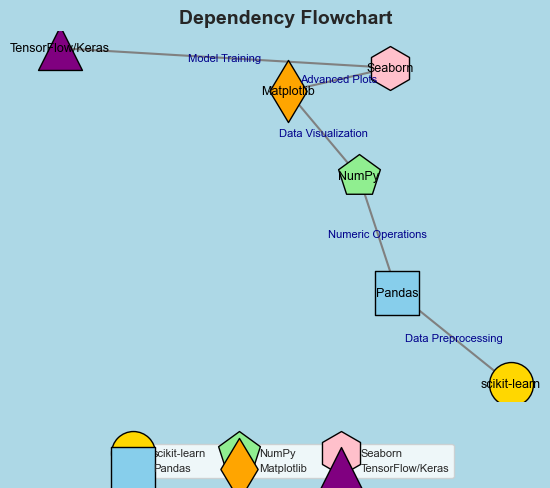

In [3]:
# -------------------------- Flowchart to illustrate the dependencies --------------------------

# Create a directed graph
G = nx.DiGraph()

# Define nodes and their properties
nodes = {
    "scikit-learn": {"color": "gold", "shape": "o"},
    "Pandas": {"color": "skyblue", "shape": "s"},
    "NumPy": {"color": "lightgreen", "shape": "p"},
    "Matplotlib": {"color": "orange", "shape": "d"},
    "Seaborn": {"color": "pink", "shape": "h"},
    "TensorFlow/Keras": {"color": "purple", "shape": "^"}
}

# Define edges with labels
edges = [
    ("scikit-learn", "Pandas", "Data Preprocessing"),
    ("Pandas", "NumPy", "Numeric Operations"),
    ("NumPy", "Matplotlib", "Data Visualization"),
    ("Matplotlib", "Seaborn", "Advanced Plots"),
    ("Seaborn", "TensorFlow/Keras", "Model Training")
]

# Add nodes and edges to the graph
for node, attr in nodes.items():
    G.add_node(node, color=attr["color"], shape=attr["shape"])

for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2])

# Get positions for nodes
pos = nx.spring_layout(G, seed=42)  # Layout for consistency

# Draw nodes with colors and shapes
for node, (x, y) in pos.items():
    attr = nodes[node]
    plt.scatter(
        x, y, s=1000, color=attr["color"], label=node, zorder=2,
        edgecolors="black", linewidths=1, marker=attr["shape"]
    )
    plt.text(x, y, node, ha="center", va="center", fontsize=9, color="black")

# Draw edges with labels
for edge in edges:
    start, end, label = edge
    x1, y1 = pos[start]
    x2, y2 = pos[end]
    plt.plot([x1, x2], [y1, y2], color="gray", zorder=1, linestyle="-", linewidth=1.5)
    plt.text(
        (x1 + x2) / 2, (y1 + y2) / 2, label, color="darkblue", fontsize=8, ha="center", va="center"
    )

# Customize the plot
plt.title("Dependency Flowchart", fontsize=14, fontweight="bold")
plt.axis("off")
plt.legend(loc="upper center", ncol=3, fontsize=8, bbox_to_anchor=(0.5, -0.1))
plt.gcf().set_facecolor("lightblue")  # Set background color
plt.show()

### **Step 2: Load and Preprocess Dataset**

In [5]:
# -------------------------- Loading and Preprocessing the Dataset --------------------------

# Load the dataset 
file_path = r"C:\Users\USER\Downloads\Advanced-Fraud-Detection-with-Anomaly-Detection\creditcard.csv"  # Raw string for Windows path

# Read the dataset into a pandas DataFrame
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display the first few rows of the dataset to understand its structure
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Check for any missing values in the dataset
print("\nMissing values in each column:")
print(data.isnull().sum())

Dataset loaded successfully

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.13745

In [6]:
# -------------------------- Dataset Summary --------------------------

# Get a summary of the dataset including column names and data types
print("\nSummary of the dataset:")
data.info()

# Display basic statistical details about the dataset
print("\nStatistical summary of the dataset:")
print(data.describe())

# Check the distribution of the target variable (fraud detection, 'Class' column)
print("\nClass distribution (fraudulent or non-fraudulent transactions):")
print(data['Class'].value_counts())

# Check for any data type inconsistencies (numeric data stored as object)
print("\nChecking data types of each column:")
print(data.dtypes)


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null

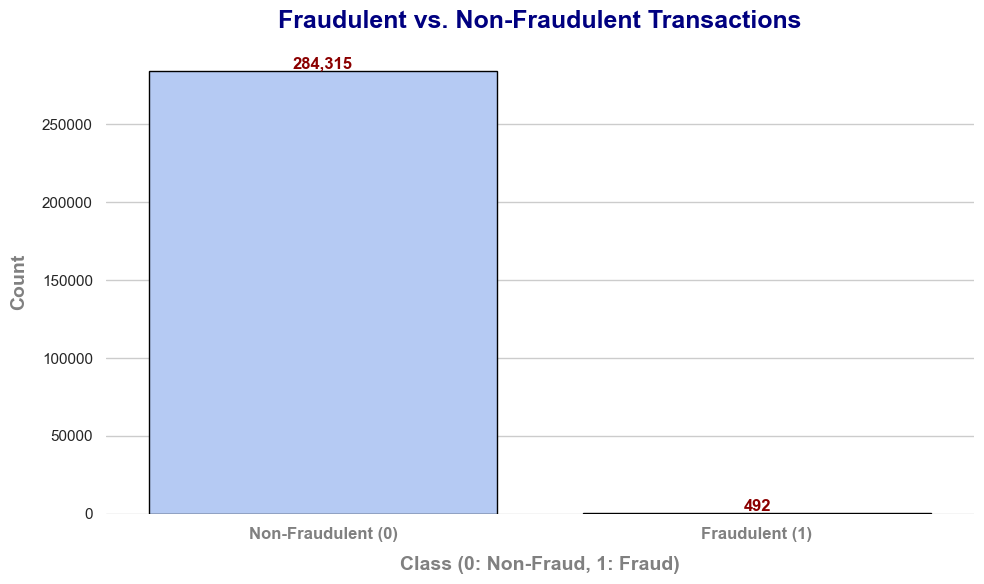

In [8]:
# -------------------------- Distribution of Fraudulent vs Non-Fraudulent Transactions --------------------------

# Set figure size and seaborn style
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Countplot for fraudulent vs non-fraudulent transactions 
ax = sns.countplot(
    x='Class', 
    data=data, 
    hue='Class',  
    palette="coolwarm", 
    edgecolor='black',
    legend=False  
)

# Add title and axis labels
ax.set_title("Fraudulent vs. Non-Fraudulent Transactions", fontsize=18, fontweight='bold', color='navy', pad=15)
ax.set_xlabel("Class (0: Non-Fraud, 1: Fraud)", fontsize=14, fontweight='semibold', color='gray', labelpad=10)
ax.set_ylabel("Count", fontsize=14, fontweight='semibold', color='gray', labelpad=10)

# Annotate the bar plot with counts
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        fontsize=12, color='darkred', fontweight='bold',
        xytext=(0, 5), textcoords='offset points'
    )

# Adjust x-tick labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Fraudulent (0)', 'Fraudulent (1)'], fontsize=12, fontweight='semibold', color='gray')

# Remove unnecessary spines
sns.despine(left=True, bottom=True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [9]:
# -------------------------- Data Preprocessing --------------------------

# Handle missing values by dropping rows with any missing values
data_cleaned = data.dropna()

# Separate features (X) and target variable (y)
X = data_cleaned.drop(columns=['Class'])
y = data_cleaned['Class']

# Display the shape of the cleaned data
print(f"Data after preprocessing: {X.shape[0]} rows, {X.shape[1]} features")

Data after preprocessing: 284807 rows, 30 features


In [12]:
# --------------------------  Data Preprocessing: Scaling and Splitting --------------------------

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first 5 rows of scaled features
print("\nFirst 5 rows of scaled features:")
print(X_scaled[:5])

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Confirm successful data split
print(f"\nTraining data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

# Check the distribution of the target variable in train and test sets
print("\nTraining set target distribution:")
print(y_train.value_counts(normalize=True))
print("\nTesting set target distribution:")
print(y_test.value_counts(normalize=True))

# Print confirmation of successful data preprocessing
print("\nData preprocessing completed successfully")


First 5 rows of scaled features:
[[-1.99658302 -0.69424232 -0.04407492  1.6727735   0.97336551 -0.24511658
   0.34706795  0.19367894  0.08263728  0.33112778  0.08338555 -0.54040704
  -0.61829572 -0.99609892 -0.32461019  1.60401384 -0.53683287  0.24486345
   0.03076993  0.49628203  0.32611802 -0.02492336  0.38285444 -0.17691133
   0.11050692  0.24658544 -0.39217043  0.33089162 -0.06378115  0.24496426]
 [-1.99658302  0.60849633  0.16117592  0.1097971   0.31652293  0.04348335
  -0.06181997 -0.06370021  0.07125348 -0.23249419 -0.15334963  1.58000285
   1.06608857  0.4914182  -0.14998248  0.69436042  0.52943375 -0.13516997
  -0.21876258 -0.17908605 -0.08961086 -0.3073768  -0.88007675  0.16220118
  -0.56113055  0.3206939   0.26106948 -0.02225568  0.04460752 -0.34247454]
 [-1.99656197 -0.69350046 -0.81157783  1.16946849  0.26823129 -0.36457179
   1.35145359  0.63977564  0.20737273 -1.37867535  0.19069961  0.61182971
   0.06613662  0.72069985 -0.17311389  2.56290618 -3.29823537  1.30686788
  

### **Step 3: Model Selection and Train Fraud Detection Model (Supervised Learning)**

In [21]:
# --------------------------  Train Fraud Detection Model (Supervised Learning) --------------------------

# Function to train and evaluate supervised learning models
def train_and_evaluate_supervised_model(model, X_train, X_test, y_train, y_test):
    """
    Train and evaluate a supervised learning model (classification).
    """
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test data

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{model.__class__.__name__} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return accuracy, precision, recall, f1

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_metrics = train_and_evaluate_supervised_model(log_reg_model, X_train, X_test, y_train, y_test)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model_metrics = train_and_evaluate_supervised_model(dt_model, X_train, X_test, y_train, y_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model_metrics = train_and_evaluate_supervised_model(rf_model, X_train, X_test, y_train, y_test)

# Confirm that all models have been trained successfully
print("Models trained successfully")


LogisticRegression Model Evaluation:
Accuracy: 0.9992
Precision: 0.8289
Recall: 0.6429
F1 Score: 0.7241

DecisionTreeClassifier Model Evaluation:
Accuracy: 0.9991
Precision: 0.7526
Recall: 0.7449
F1 Score: 0.7487

RandomForestClassifier Model Evaluation:
Accuracy: 0.9996
Precision: 0.9412
Recall: 0.8163
F1 Score: 0.8743
Models trained successfully


### **Step 4: Train Anomaly Detection Model**

In [22]:
# --------------------------  Train Anomaly Detection Model --------------------------

# Function to train and evaluate anomaly detection models
def train_and_evaluate_anomaly_model(model, X_train, X_test, y_test):
    """
    Train and evaluate an anomaly detection model.
    """
    # Fit the model on the training data
    model.fit(X_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Convert model output to match y_test labels (1 for normal, 0 for anomaly)
    y_pred = [1 if x == -1 else 0 for x in y_pred]  # Convert anomalies (-1) to 1 (fraud), normal (1) to 0 (non-fraud)
    
    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'])
    
    print(f"\n{model.__class__.__name__} Model Evaluation:")
    print(report)
    
    return report

# Isolation Forest
iso_forest_model = IsolationForest(contamination=0.01, random_state=42)
iso_forest_report = train_and_evaluate_anomaly_model(iso_forest_model, X_train, X_test, y_test)

# One-Class SVM
oc_svm_model = OneClassSVM(nu=0.01, kernel="rbf", gamma="scale")
oc_svm_report = train_and_evaluate_anomaly_model(oc_svm_model, X_train, X_test, y_test)

# Confirm that anomaly detection models have been trained successfully
print("Anomaly detection models trained successfully")


IsolationForest Model Evaluation:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.99      0.99     56864
       Fraud       0.11      0.66      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.83      0.59     56962
weighted avg       1.00      0.99      0.99     56962


OneClassSVM Model Evaluation:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.99      0.99     56864
       Fraud       0.08      0.57      0.14        98

    accuracy                           0.99     56962
   macro avg       0.54      0.78      0.56     56962
weighted avg       1.00      0.99      0.99     56962

Anomaly detection models trained successfully


In [25]:
# --------------------------  Autoencoder Model --------------------------

# Function to train and evaluate an Autoencoder model
def train_and_evaluate_autoencoder(X_train, X_test, y_test, encoding_dim=14):
    """
    Train and evaluate an Autoencoder for anomaly detection.
    """
    # Define the Autoencoder model architecture
    input_layer = Input(shape=(X_train.shape[1],))
    encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l2(1e-5))(input_layer)
    decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)
    
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Train the Autoencoder
    autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test), verbose=1)

    # Use the Autoencoder to predict on the test data
    X_test_pred = autoencoder.predict(X_test)

    # Calculate reconstruction error (MSE between original and predicted data)
    mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)
    
    # Define a threshold for anomaly detection
    threshold = np.percentile(mse, 95)  # Using 95th percentile as threshold

    # Label as anomaly if MSE exceeds the threshold
    y_pred = [1 if e > threshold else 0 for e in mse]

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'])
    
    print("\nAutoencoder Model Evaluation:")
    print(report)
    
    return report

# Train and evaluate Autoencoder
autoencoder_report = train_and_evaluate_autoencoder(X_train, X_test, y_test)

# Confirm that Autoencoder model has been trained successfully
print("Autoencoder model trained successfully")

Epoch 1/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0719 - val_loss: 0.9020
Epoch 2/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8876 - val_loss: 0.8468
Epoch 3/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8235 - val_loss: 0.8221
Epoch 4/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8011 - val_loss: 0.8075
Epoch 5/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7800 - val_loss: 0.7971
Epoch 6/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7835 - val_loss: 0.7889
Epoch 7/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7836 - val_loss: 0.7823
Epoch 8/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7745 - val_loss: 0.7771
Epoch 9/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7645 - val_loss: 0.7728
Epoch 10/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7778 - val_loss: 0.7695
Epoch 11/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7636 - val_loss: 0.7665
Epoch 12/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

### **Step 5: Ensemble Learning**

In [30]:
# -------------------------- Ensemble Learning --------------------------

# Define base models
logistic_regression = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

In [31]:
# -------------------------- Voting Classifier --------------------------
# Voting Classifier (Hard Voting)
voting_clf = VotingClassifier(
    estimators=[
        ('Logistic Regression', logistic_regression),
        ('Decision Tree', decision_tree),
        ('Random Forest', random_forest)
    ],
    voting='hard'  # Change to 'soft' for soft voting
)

# Train Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate Voting Classifier
voting_pred = voting_clf.predict(X_test)
print("Voting Classifier Report:")
print(classification_report(y_test, voting_pred))
print("Accuracy:", accuracy_score(y_test, voting_pred))

Voting Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9995435553526912


In [34]:
# -------------------------- Bagging Classifier --------------------------
# Bagging Classifier using default base estimator (Decision Tree)
bagging_clf = BaggingClassifier(
    n_estimators=50,
    random_state=42
)

# Train Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Evaluate Bagging Classifier
bagging_pred = bagging_clf.predict(X_test)
print("\nBagging Classifier Report:")
print(classification_report(y_test, bagging_pred))
print("Accuracy:", accuracy_score(y_test, bagging_pred))


Bagging Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.84      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9995962220427653


In [29]:
# -------------------------- Boosting Classifiers --------------------------
# AdaBoost Classifier
adaboost_clf = AdaBoostClassifier(
    base_estimator=decision_tree,
    n_estimators=50,
    random_state=42
)

# Train AdaBoost Classifier
adaboost_clf.fit(X_train, y_train)

# Evaluate AdaBoost Classifier
adaboost_pred = adaboost_clf.predict(X_test)
print("\nAdaBoost Classifier Report:")
print(classification_report(y_test, adaboost_pred))
print("Accuracy:", accuracy_score(y_test, adaboost_pred))

# Gradient Boosting Classifier
gradient_boosting_clf = GradientBoostingClassifier(random_state=42)

# Train Gradient Boosting Classifier
gradient_boosting_clf.fit(X_train, y_train)

# Evaluate Gradient Boosting Classifier
gradient_boosting_pred = gradient_boosting_clf.predict(X_test)
print("\nGradient Boosting Classifier Report:")
print(classification_report(y_test, gradient_boosting_pred))
print("Accuracy:", accuracy_score(y_test, gradient_boosting_pred))

KeyboardInterrupt: 